# Algoritmo genetico cuantico
A continuasión, se muestra un algoritmo basado en la fisica cuantica para generar una solución para la siguiente función:

$$
y = \frac{\lvert x - 5 \rvert}{2 + \sin(x)}
$$

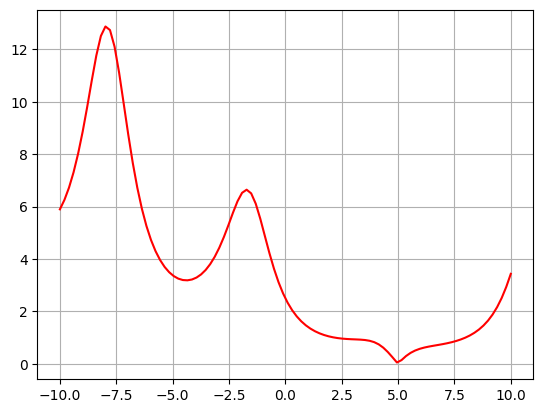

In [1]:
# Construir algotimo genetico y encontrar el minimo de la funcion abs(x-5)/(2+sin(x))
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = abs(x-5) / (2 + np.sin(x))

plt.plot(x, y, "r")
plt.grid()
plt.show()

In [14]:
# FUNCIÓN QUE INCIALIZA LAS AMPLITUDES
# AL PRINCIPIO TODAS LAS AMPLITUDES SON IGUALESS 1/sqrt(2)

def amplitudes(tamPoblacion, numQubits):
    pobAmplitudes = np.full((tamPoblacion, numQubits), 1 / np.sqrt(2))
    return pobAmplitudes

A = amplitudes(10, 5)
print(A)

[[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]]


In [3]:
# FUNCIOENS QUE COLAPSA LA POBLACION DE APTITUDES A 0 Y 1 MEDIANTE NUM ALEATORIOS

def generarSoluciones(amplitudes):
    [r, c] = amplitudes.shape
    matrizBinaria = np.zeros((r,c), dtype=int)
    matrizAletorio = np.random.rand(r,c)
    
    # Colapsamos para decicir 
    for i in range(r):
        for j in range(c):
            if matrizAletorio[i,j] < amplitudes[i,j]:
                matrizBinaria[i,j] = 1
            else:
                matrizBinaria[i, j] = 0
    
    return matrizBinaria

In [4]:
# FUNCIÓN DECODIFICAR (Todabia no esta)
def decodificar(P, Imin, Imax):
    # P: población de individuos
    # Imin: Intervalo minimo 
    # Imax: Intervalo maximo
    [r, c] = P.shape # r: numero de individuos, c: longitud de la representación binaria
    decimal = np.zeros(r)
    decimalRescalado = np.zeros(r)

    for i in range(r):
        for j in range(c):
            # Se transforma de binario a decimal entero
            decimal[i] = decimal[i] + P[i, j] * 2 ** (c - j - 1)
            # Se reescala el valor decimal en el espacio de busqueda (0 a 2)
            decimalRescalado [i] = (Imax - Imin) * decimal[i] / (2 ** c - 1) + Imin
    return decimalRescalado

In [5]:
# FUNCIÓN FITNESS PARA LA MEJOR SOLUCIÓN (Todabia no esta)
def Fitness(Poblacion, Imin, Imax):
    [r, c] = Poblacion.shape
    x = decodificar(Poblacion, Imin, Imax)
    fitness =  abs(x-5) / (2 + np.sin(x))
    return fitness

In [6]:
# OPERADORES DE EVOLUCIÓN (ROTACIÓN, MUTACIÓN, SELECCIÓN)

def rotacionGate(P, soluciones, mejorSolucion, theta = 0.1):
    [r, c] = P.shape
    
    for i in range(r):
        for j in range(c):
            if soluciones[i, j] != mejorSolucion[j]:
                if mejorSolucion[j] == 1:
                    P[i, j] = P[i, j] + np.sin(theta) * (1 - P[i, j])
                else:
                    P[i, j] = P[i, j] - np.sin(theta) * P[i, j]
    
    P = np.clip(P, 0.05, 0.95)
    return P
    

In [7]:
# FUNCION QUE IMPLEMENTAR EL OPERADOR MUTACION
def mutacionGate(P, pm):
    [r, c] = P.shape 
    matrizAuxiliar = np.random.rand(r,c)
    mascara = np.zeros((r, c), dtype=bool)

    for i in range(r):
        for j in range(c):
            if matrizAuxiliar[i,j] < pm:
                mascara[i,j] = True
            else:
                mascara[i,j] = False
    
        P = np.where(mascara, 1-P, P)
    return P

In [8]:
P = np.array([[0.5, 0.7, 0.2, 0.9],
     [0.3, 0.4, 0.6, 0.8],
     [0.9, 0.1, 0.5, 0.5],
     [0.9, 0.1, 0.5, 0.5]])
pm = 0.5

prueba = mutacionGate(P, pm)
print(prueba)

[[0.5 0.7 0.2 0.9]
 [0.3 0.6 0.4 0.8]
 [0.9 0.1 0.5 0.5]
 [0.9 0.9 0.5 0.5]]


In [9]:
# **************PARAMETROS INICIALES******************
tamPoblacion = 6
numQubits = 10
generacion = 10
pm = 0.5
iMin = -10
iMax = 10

# ************Ejecuciones*********************************
P = amplitudes(tamPoblacion, numQubits)
mejorSolucion = None
mejorFitness = float('inf')
historialMejorGen = []

for k in range(generacion):
    # Generamos la soluciones 
    
    soluciones = generarSoluciones(P)
    
    # Evaluar fitness
    fitnessVals = Fitness(soluciones, iMin, iMax)
    
     # Seleccionamos al mejor individuo
    idx_mejor = np.argmin(fitnessVals)
    actualMejorFitness = fitnessVals[idx_mejor]
    actualMejorSolucion = soluciones[idx_mejor]


    if actualMejorFitness < mejorFitness:
        mejorSolucion = actualMejorSolucion
        mejorFitness = actualMejorFitness
    
    historialMejorGen.append(mejorFitness)
    
    if mejorSolucion is not None:
        P = rotacionGate(P, soluciones, mejorSolucion)
        
    # Aplicar mutación
    P = mutacionGate(P, pm)

#*****************Reporte********************
print("Mejor solución binaria:", mejorSolucion)
x_mejor = decodificar(mejorSolucion.reshape(1, -1), iMin, iMax)
print("Valor real:", x_mejor)
print("Fitness:", mejorFitness)
    

Mejor solución binaria: [1 0 1 1 1 1 1 1 0 1]
Valor real: [4.95601173]
Fitness: 0.04272657395596312


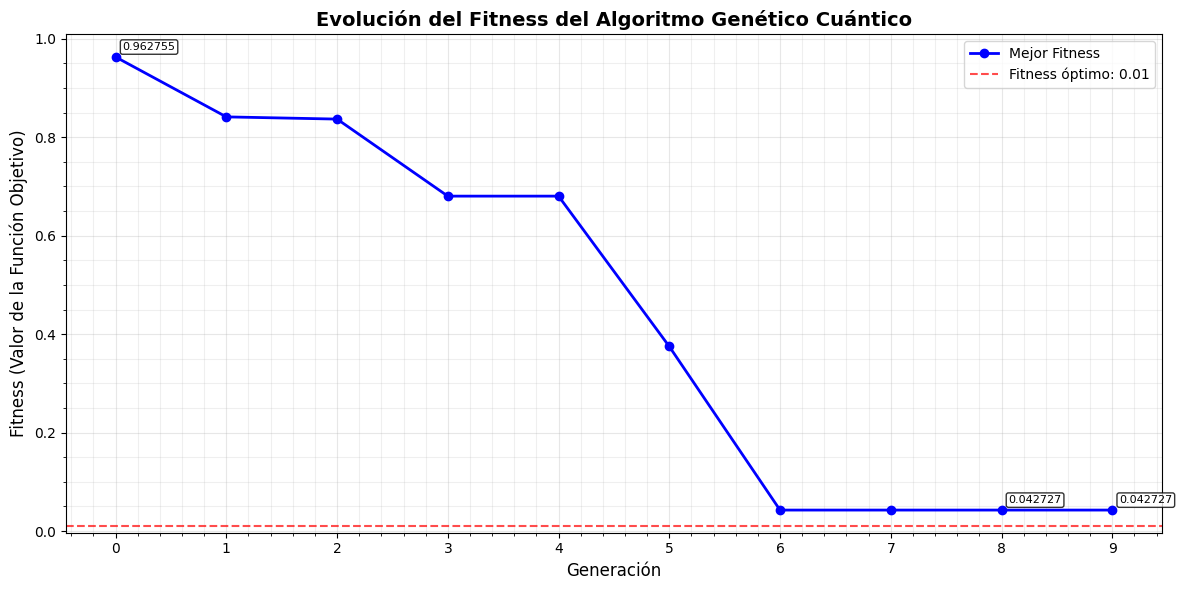

=== ANÁLISIS DEL HISTORIAL ===
Número de generaciones: 10
Fitness inicial: 0.962755
Fitness final: 0.042727
Mejor fitness alcanzado: 0.042727
Mejora relativa: 95.56%
Generación donde ocurrió la mejora: 6


In [13]:
historial_array = np.array(historialMejorGen)

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar el historial
plt.plot(historial_array, 'b-o', linewidth=2, markersize=6, label='Mejor Fitness')

# Personalizar la gráfica
plt.title('Evolución del Fitness del Algoritmo Genético Cuántico', fontsize=14, fontweight='bold')
plt.xlabel('Generación', fontsize=12)
plt.ylabel('Fitness (Valor de la Función Objetivo)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)


# Añadir línea horizontal en el punto de mejora
plt.axhline(y=0.01, color='red', linestyle='--', alpha=0.7, label='Fitness óptimo: 0.01')

# Mejorar los ticks del eje x
plt.xticks(range(len(historial_array)))

# Añadir cuadrícula secundaria
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

# Mostrar valores en algunos puntos
for i, valor in enumerate(historial_array):
    if i == 0 or i == len(historial_array)-1 or i == 8:  # Primera, última y punto de mejora
        plt.annotate(f'{valor:.6f}', 
                    xy=(i, valor), 
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=8,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

plt.legend()
plt.tight_layout()
plt.show()

# Análisis estadístico básico
print("=== ANÁLISIS DEL HISTORIAL ===")
print(f"Número de generaciones: {len(historial_array)}")
print(f"Fitness inicial: {historial_array[0]:.6f}")
print(f"Fitness final: {historial_array[-1]:.6f}")
print(f"Mejor fitness alcanzado: {min(historial_array):.6f}")
print(f"Mejora relativa: {((historial_array[0] - min(historial_array)) / historial_array[0] * 100):.2f}%")
print(f"Generación donde ocurrió la mejora: {np.argmin(historial_array) }")